##### Import Necessary Libraries

In [1]:
from FMR import FMR

##### Note

In [ ]:
# Leaving the code as it is,it will run and run through all the basic functions.
# Alternate code is marked with a double hashtag (##) and can be uncommented to
# test. 

##### Initialize the Repository

In [2]:
# Create database object
#
# If you do not specify a folder name in the FMR() arguments,
# a folder named FMR will be automoatically created. All database
# components will be stored here (i.e. stationID list, database storage,
# data files[csv])
#
db = FMR()
#
# To specify your own folder name, just call it in the argument FMR("fileName").
#
## db = FMR('CA_FMR')

##### Create/Update stationID List

In [3]:
# Create/update stationID list (list of all stations/their info (lat,lon,gacc,site name,etc) 
# in a given state or gacc).
#
# Note: Once you have a stationID list from one of the ways listed below, that stationID list
#       is permanant unless you delete it. So, if you create a stationID list for all the sites
#       in California and then call one of the create/update functions (seen below) for a different 
#       state/gacc, those new sites will be added to the existing stationID list.
#
# There are multiple ways to create/update the stationID list. 
#-------------------------------------------------------------
# To update the stationID list by a given state, use the function below.
# By changing the state argument, you change which state you are grabbing
# all of the stations from.
#
db.update_state_stations(state="CA")
#
# By default this function will grab the site data for California, so you can also
# write the function above as:
#    
## db.update_state_stations()   
# 
# Alternatively you can use the function as seen below if you want a different state.
#
## db.update_state_stations("AZ")
#
#-------------------------------
# Or you can update the stationID list via a GACC.
#
## db.update_gacc_stations(gacc="NOCC")
#
# By default this function will grab the site data for the NOCC GACC, so you can also
# write the function above as:
#    
## db.update_gacc_stations()
#
# Alternatively you can use the function as seen below.
#
## db.update_gacc_stations("EACC")
#
#--------------------------------
# Lastly, you can update all the stations in the United States by the function below.
#
## db.update_all()

##### Obtain and Store all the Data for the Sites from the stationID List in the Fuel Moisture Repository

In [4]:
# Create/update local fuel mositure database.
#
# Based on the stationID list that you created above, those sites will be grabbed from the NFMD
# and will be put onto your local database. 
# By default, this function will grab data from 2000 - Present. You can change this via the arguments.
#
db.update_data()
#
# When giving a specified year range that you want:
#
## db.update_data(1990,2010)
## db.update_data(startYear=1700,endYear=1900)
# 
# Where 1990 - 2010 is the range of years you want to save data from into your local database.
#
# Note: for each year you get data from, a respective pickle file will be created to hold all the
#       data from that year (i.e. 1990.pkl,1991.pkl,2001.pkl,etc).

##### Get Data from the Fuel Moisture Repository

In [21]:
# Get data from the local fuel mositure database.
#
# Default parameters are set for the get_data function as seen below. If left unchanged, it will grab all of
# the data from the local database. If a parameter is left as None, it means all the data from that parameter
# will be grabbed (i.e. if fuelType is None, all fuels will be grabbed, or if fuelVariation is None, all variations
# will be grabbed) 
#
# db.params = {'startYear': int(datetime.datetime.now().year), 'endYear': int(datetime.datetime.now().year), 
#                    'stationID': None, 'fuelType': None, 'fuelVariation': None, 
#                    'latitude1': None, 'latitude2': None, 'longitude1': None, 'longitude2': None, 'makeFile': False}
#
# To change these parameters, you can do this:
#
db.params['startYear'] = 2000
db.params['endYear'] = 2022
## db.params['stationID'] = 20
##db.params['stationID'] = 256
##db.params['fuelType'] = 'Chamise'
##db.params['fuelVariation'] = 'New Growth'
##db.params['state'] = "CA"
## db.params['makeFile'] = True       # This will save the data you get into a csv if you set this to True.
#
# Once you have the parameters you want, you can call the get_data function.
#
allFMR = db.get_data()
#
# If you have the makeFile paramter as true and just want the csv:
#
## db.get_data()

##### Plot the Queried Data

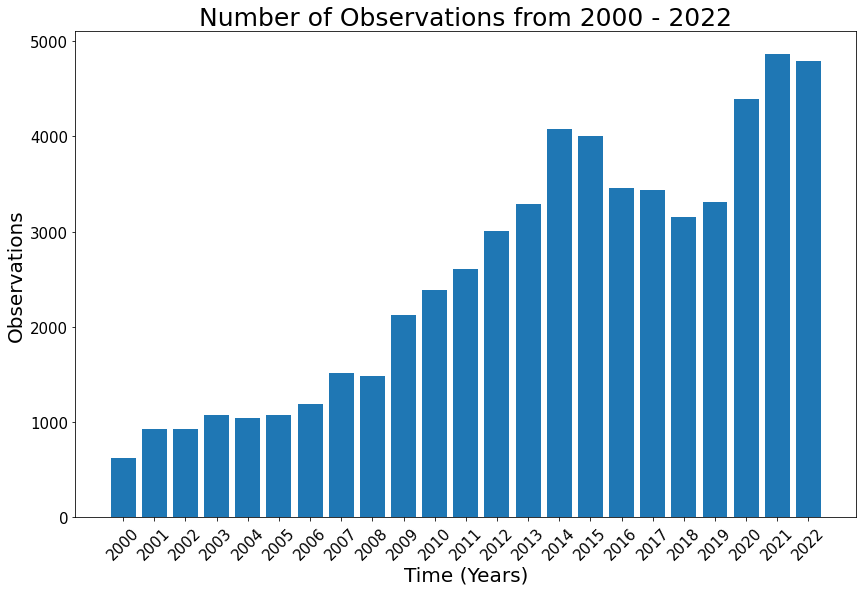

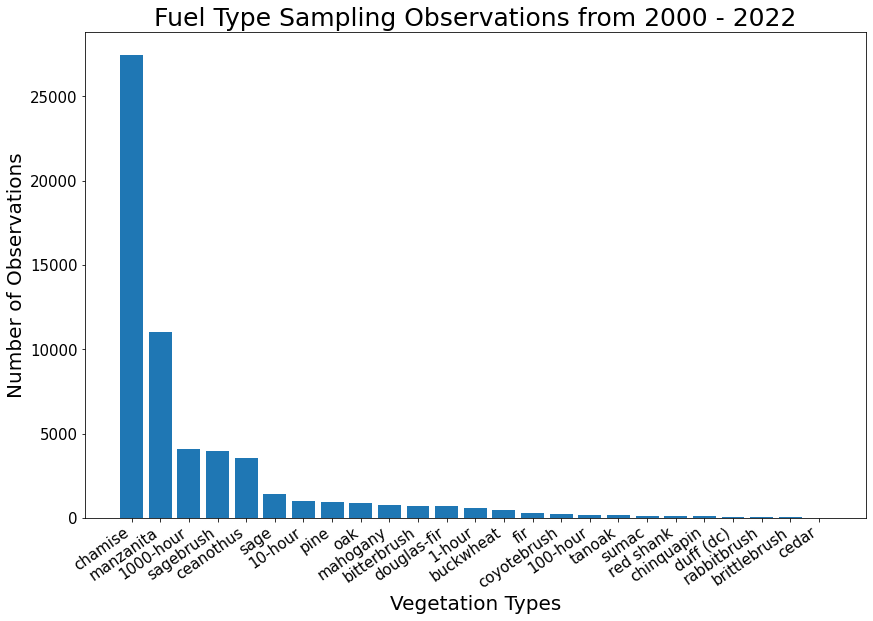

In [24]:
# Plot the data
#
# There are a couple different plots you can create.
#
# Basic line plot for each site/fuelType/fuelVariation
#
## db.plot_lines(allFMR)
#
# Standard deviation plot for each fuelType/fuelVariation. 
# Mean line is plotted for each month along with its standard deviation for each fuelType/fuelVariation.
# i.e. lines you will have : [Chamise - Old Growth, Chamise - New Growth, Chamise - None].
#
## db.plot_lines_mean(allFMDB)
#
# Bar plot that shows mean and standard devaition values for all the data each year unless monthly paramter 
# is set to True.
#
## db.plot_bars_mean(allFMDB, monthly=False)
## db.plot_bars_mean(allFMDB, monthly=True)
## db.plot_bars_mean(allFMDB, True)
#
# Bar plot that displays the number of observations each year from the queried data
#
db.plot_yearly_obs(allFMR)
#
# Bar plot that displays the types of fuel from the quried data (up to 25 fuel types)
#
db.plot_fuel_types(allFMR)